In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Hp'

In [3]:
os.chdir("C:\\Users\\Hp\\data")

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
bmart=train.append(test,ignore_index=True)

In [8]:
bmart.shape

(14204, 12)

In [9]:
bmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
bmart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [11]:
bmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [13]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# univariate analysis

In [14]:
bmart['Item_Fat_Content'].value_counts(normalize=True)

Low Fat    0.597367
Regular    0.339623
LF         0.036750
reg        0.013729
low fat    0.012532
Name: Item_Fat_Content, dtype: float64

In [15]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
#this is merging the value of  LF and 
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['reg'],'Regular')

In [16]:
bmart['Item_Fat_Content'].value_counts(normalize=True)*100,0

(Low Fat    64.664883
 Regular    35.335117
 Name: Item_Fat_Content, dtype: float64,
 0)

In [17]:
bmart["Item_Identifier"].str[:2].value_counts(normalize=True)
#str[:2]convert item_identifier into string and picks first two characters ,categories it and then counts the value 

FD    0.718178
NC    0.189102
DR    0.092720
Name: Item_Identifier, dtype: float64

In [18]:
bmart['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

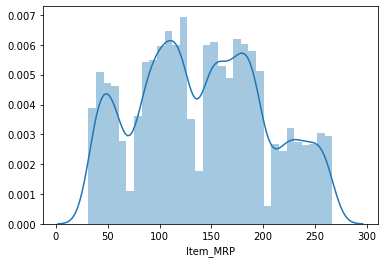

In [19]:
sns.distplot(bmart["Item_MRP"])
#one option is creating bucktes MRP 

In [20]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

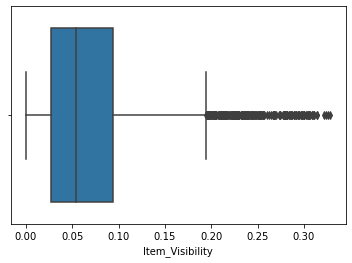

In [21]:
sns.boxplot(bmart["Item_Visibility"])

In [22]:
m3s=np.mean(bmart["Item_Visibility"])+3*np.std(bmart["Item_Visibility"])

In [23]:
print(bmart[bmart["Item_Visibility"]>m3s]["Item_Visibility"].count())
print(bmart[bmart["Item_Visibility"]>m3s]["Item_Visibility"].count()/bmart.shape[0])

173
0.01217966769923965


In [24]:
p99=np.percentile(bmart["Item_Visibility"],99)

In [25]:
p99

0.2303851588199999

In [26]:
print(bmart[bmart["Item_Visibility"]>np.percentile(bmart["Item_Visibility"],99)]["Item_Visibility"].count())
print(bmart[bmart["Item_Visibility"]>np.percentile(bmart["Item_Visibility"],99)]["Item_Visibility"].count()/bmart.shape[0])

143
0.010067586595325261


In [27]:
bmart.loc[(bmart.Item_Visibility>p99),"Item_Visibility"]=p99

In [28]:
bmart["Item_Visibility"].describe()

count    14204.000000
mean         0.065558
std          0.049957
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.230385
Name: Item_Visibility, dtype: float64

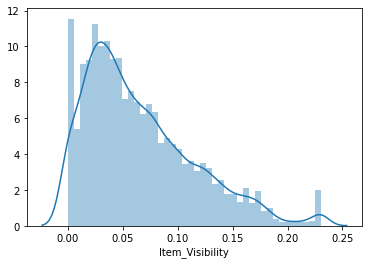

In [29]:
sns.distplot(bmart["Item_Visibility"])
plt.show()

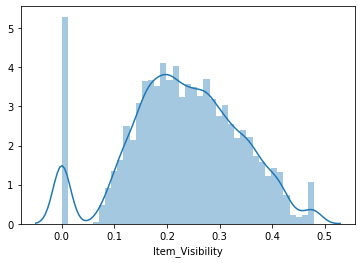

In [30]:
sns.distplot(np.sqrt(bmart['Item_Visibility']))

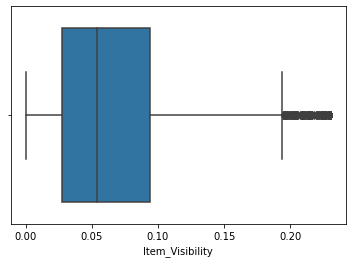

In [31]:
sns.boxplot(bmart['Item_Visibility'])

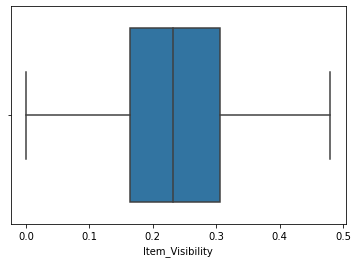

In [32]:
sns.boxplot(np.sqrt(bmart['Item_Visibility']))

In [33]:
bmart['Item_Visibility_SQRT']=np.sqrt(bmart['Item_Visibility'])

In [34]:
bmart["Item_Visibility_SQRT"].describe()

count    14204.000000
mean         0.233068
std          0.106012
min          0.000000
25%          0.164425
50%          0.232423
75%          0.306655
max          0.479985
Name: Item_Visibility_SQRT, dtype: float64

In [35]:
#Replacing 0 Item visitbility to mean
mean0=np.mean(bmart[bmart['Item_Visibility_SQRT']>0]['Item_Visibility_SQRT'])
print(mean0)

0.24844219377236626


In [36]:
bmart['Item_Visibility_SQRT']=bmart['Item_Visibility_SQRT'].replace(0,mean0)

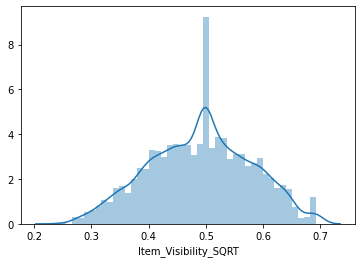

In [37]:
sns.distplot(np.sqrt(bmart["Item_Visibility_SQRT"]))

In [38]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Visibility_SQRT            0
dtype: int64

In [39]:
bmart['Item_Weight'].isnull().sum()

2439

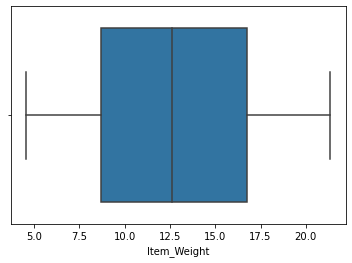

In [40]:
sns.boxplot(bmart['Item_Weight'])

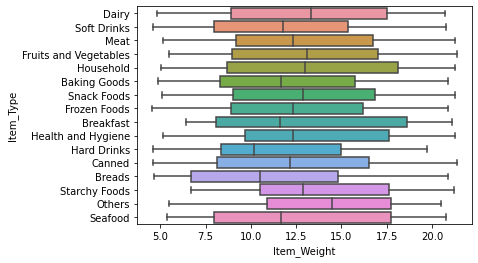

In [41]:
sns.boxplot(x=bmart['Item_Weight'],y=bmart['Item_Type'])

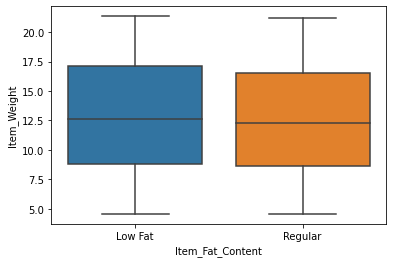

In [42]:
sns.boxplot(x=bmart['Item_Fat_Content'],y=bmart['Item_Weight'])

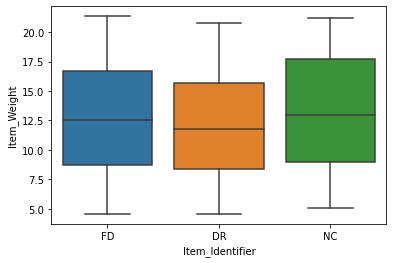

In [43]:
sns.boxplot(x=bmart['Item_Identifier'].str[:2],y=bmart['Item_Weight'])

In [44]:
bmart['Item_Weight']=bmart['Item_Weight'].fillna(bmart['Item_Weight'].groupby(bmart['Item_Type']).transform('mean'))

In [45]:
bmart['Item_Weight'].describe()

count    14204.000000
mean        12.793006
std          4.240924
min          4.555000
25%          9.300000
50%         12.800000
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [46]:
bmart["Item_Weight"].isnull().sum()

0

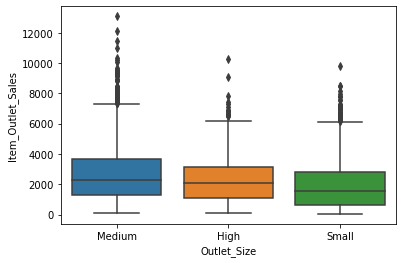

In [47]:
sns.boxplot(x=bmart['Outlet_Size'],y=bmart['Item_Outlet_Sales'])

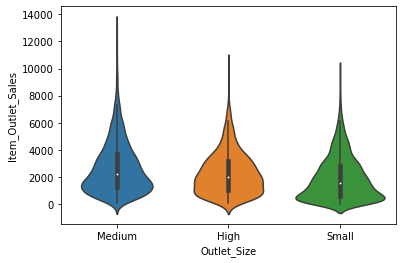

In [48]:
sns.violinplot(x=bmart['Outlet_Size'],y=bmart['Item_Outlet_Sales'])

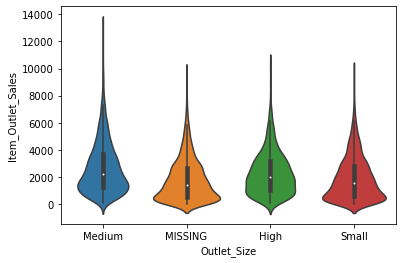

In [49]:
sns.violinplot(bmart['Outlet_Size'].fillna("MISSING"),bmart['Item_Outlet_Sales'])

In [50]:
bmart['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [51]:
bmart['Outlet_Size']=bmart['Outlet_Size'].fillna("Small")

In [52]:
bmart['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [53]:
bmart['Item_Identifier_1']=bmart['Item_Identifier'].str[:2]

In [54]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Visibility_SQRT            0
Item_Identifier_1               0
dtype: int64

In [55]:
bmart['Tenure']=2020-bmart['Outlet_Establishment_Year']

In [56]:
bmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000
mean,12.793006,0.065558,141.004977,1997.830681,2181.288914,0.248442,22.169319
std,4.240924,0.049957,62.086938,8.371664,1706.499616,0.087492,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.059789,11.000000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400,0.182053,16.000000
50%,12.800000,0.054021,142.247000,1999.000000,1794.331000,0.248442,21.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,0.306655,33.000000
max,21.350000,0.230385,266.888400,2009.000000,13086.964800,0.479985,35.000000


In [57]:

dbmart=pd.get_dummies(bmart,drop_first=True)
dbmart.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
0,9.30,0.016047,249.8092,1999,3735.1380,0.126678,21,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,2009,443.4228,0.138846,11,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,0.129461,21,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,1998,732.3800,0.248442,22,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.000000,53.8614,1987,994.7052,0.248442,33,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [58]:
train_cl=dbmart[dbmart['Item_Outlet_Sales'].notnull()]
test_cl=dbmart[dbmart['Item_Outlet_Sales'].isnull()]

print(train_cl.shape)
print(test_cl.shape)

(8523, 1599)
(5681, 1599)


In [59]:
train_cl.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
0,9.30,0.016047,249.8092,1999,3735.1380,0.126678,21,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,2009,443.4228,0.138846,11,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,0.129461,21,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,1998,732.3800,0.248442,22,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.000000,53.8614,1987,994.7052,0.248442,33,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [60]:
train_cl.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846672,0.065752,140.992782,1997.831867,2181.288914,0.248668,22.168133,0.000821,0.000939,0.000352,...,0.109117,0.327702,0.562947,0.326763,0.393054,0.654347,0.108882,0.109703,0.718644,0.187610
std,4.232806,0.050154,62.275067,8.371760,1706.499616,0.087901,8.371760,0.028648,0.030625,0.018759,...,0.311804,0.469403,0.496051,0.469057,0.488457,0.475609,0.311509,0.312538,0.449687,0.390423
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.059789,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,0.181894,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000,0.248442,21.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,0.307547,33.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,21.350000,0.230385,266.888400,2009.000000,13086.964800,0.479985,35.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
bmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000
mean,12.793006,0.065558,141.004977,1997.830681,2181.288914,0.248442,22.169319
std,4.240924,0.049957,62.086938,8.371664,1706.499616,0.087492,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.059789,11.000000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400,0.182053,16.000000
50%,12.800000,0.054021,142.247000,1999.000000,1794.331000,0.248442,21.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,0.306655,33.000000
max,21.350000,0.230385,266.888400,2009.000000,13086.964800,0.479985,35.000000


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

In [79]:
train_Y=train_cl['Item_Outlet_Sales']
train_X=train_cl.drop(['Item_Outlet_Sales'],axis=1)
test_X=test_cl.drop(['Item_Outlet_Sales'],axis=1)

In [80]:
len(train_X)

8523

In [77]:
train_X.to_csv("train.csv")
pd.DataFrame(train_Y).to_csv("trainY.csv")

In [78]:
import os
os.getcwd()

'C:\\Users\\Hp\\data'

In [81]:
reg=LinearRegression()
reg.fit(train_X,train_Y)

LinearRegression()

In [82]:
print(reg.intercept_)
print(reg.coef_)

1.6845159728380524e+16
[-1.45890823e+00 -5.14975369e+02 -2.07531694e-02 ... -2.06905821e+13
  2.17194168e+12  4.29782295e+12]


In [83]:
test_cl.drop('Item_Outlet_Sales',axis=1,inplace=True)

F:\ANACONDA\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
lm=reg.predict(test_X)

In [121]:
type(lm)

numpy.ndarray

In [122]:
lm

array([1676., 1602., 2514., ..., 2042., 2670., 1750.])

In [123]:
lm.shape

(5681,)

In [108]:
import pandas as pd

In [124]:
df=pd.DataFrame(lm)

In [125]:
df.shape

(5681, 1)

In [132]:
df.rename(columns={"0":"Item_Outlet_Sales"},inplace=True)

In [139]:
test.shape

(5681, 13)

In [138]:
test.columns

Index([          'Item_Identifier',               'Item_Weight',
                'Item_Fat_Content',           'Item_Visibility',
                       'Item_Type',                  'Item_MRP',
               'Outlet_Identifier', 'Outlet_Establishment_Year',
                     'Outlet_Size',      'Outlet_Location_Type',
                     'Outlet_Type',                           0,
                                 0],
      dtype='object')

In [142]:
predicted=pd.concat([test[["Item_Identifier","Outlet_Identifier"]],df],axis=1)

In [145]:
predicted.head()

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1676.0
1,FDW14,OUT017,1602.0
2,NCN55,OUT010,2514.0
3,FDQ58,OUT017,2086.0
4,FDY38,OUT027,5222.0


In [144]:
predicted.rename(columns={"0":"Item_Outlet_Sales"},inplace=True)

In [94]:
pd.DataFrame(lm).shape

(5681, 1)

In [146]:
predicted.to_csv("Prediction.csv",index=False)